<a href="https://colab.research.google.com/github/JcaHernandez99/Ploxpot/blob/main/Proyecto_2_%E2%80%93_Modelos_de_clasificaci%C3%B3n_supervisada_para_evaluar_la_calidad_de_un_automovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

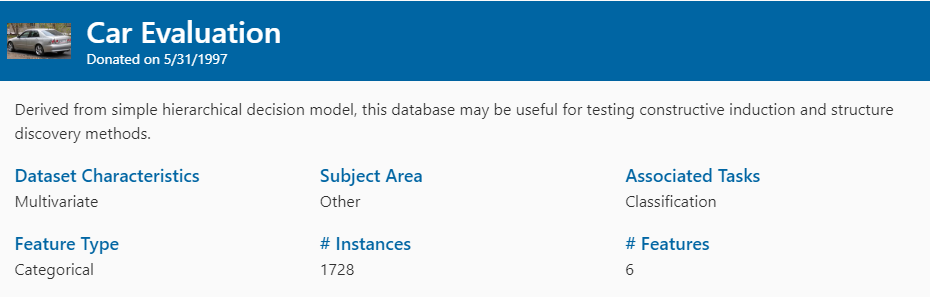

**Explicacion BD**

---


* El conjunto de datos de Evaluación de Automóviles del Repositorio de Aprendizaje Automático de UCI es un conjunto de datos que trata sobre la evaluación de coches basándose en varios atributos.

* Detalles clave sobre el conjunto de datos de Evaluación de Automóviles:

* Se derivó de un modelo de decisión jerárquico simple desarrollado originalmente para la demostración de DEX.

* El modelo evalúa los coches según la siguiente estructura conceptual: CAR (aceptabilidad del coche), que se divide en PRICE (precio total) y TECH (características técnicas).

* El conjunto de datos contiene ejemplos con la información estructural eliminada, y relaciona directamente el concepto objetivo CAR con los seis atributos de entrada: buying (precio de compra), maint (coste de mantenimiento), doors (puertas), persons (capacidad de personas), lug_boot (capacidad del maletero) y safety (seguridad).

* El conjunto de datos puede ser particularmente útil para probar métodos de inducción constructiva y descubrimiento de estructuras debido a la conocida estructura conceptual subyacente.

* El conjunto de datos contiene 1728 instancias y 6 características categóricas, siendo la variable objetivo el nivel de aceptación del coche (unacc, acc, good, vgood).

* En resumen, el conjunto de datos de Evaluación de Automóviles del Repositorio de Aprendizaje Automático de UCI se enfoca en la evaluación de coches basándose en su precio de compra, coste de mantenimiento, características técnicas y otros atributos.








**Analisis BD y procesamiento**


---


* Antes de proceder con cualquier análisis de datos, es esencial realizar una verificación de datos nulos para decidir sobre métodos de gestión como imputación o eliminación. Un Análisis Exploratorio de Datos (EDA) ayuda a entender la distribución de variables, detectar outliers y correlaciones, apoyado por herramientas visuales como histogramas y gráficos de dispersión. Para modelos de machine learning, las variables categóricas requieren transformación a formatos numéricos mediante técnicas como One-Hot o Label Encoding. Además, el escalado de características es crítico para algoritmos basados en distancias, asegurando homogeneidad en los rangos o varianzas. La creación de visualizaciones claras y la división del dataset en conjuntos de entrenamiento y prueba son pasos fundamentales para garantizar análisis efectivos y evitar el sobreajuste, facilitando evaluaciones precisas y justas del modelo.

In [23]:
# @title Importar librerias
from ucimlrepo import fetch_ucirepo
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# @title Muestreo de informacion de la BD
car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features
y = car_evaluation.data.targets
df = pd.concat([X, y], axis=1)
print(df.head())
print(df.info())
print(df.describe(include='all'))
print(car_evaluation.metadata)
print(car_evaluation.variables)


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh 

In [25]:
# @title Modelamiento y entrenamientos
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
#columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
#df = pd.read_csv(url, names=columns)

# Mostrar cantidad de registros y variables
print("Cantidad de registros:", df.shape[0])
print("Cantidad de variables:", df.shape[1])

# Identificar tipos de datos
print("Variables cualitativas:", df.columns.tolist())

# Resumen de la información general de la base de datos
print(df.describe(include='all'))

# Conversión de datos categóricos a numéricos
label_encoders = {}
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Dividir el dataset en entrenamiento y testeo en 0.3
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

# Modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Reporte de clasificación para {name}:")
    print(classification_report(y_test, predictions))

# Comparación de resultados, aqui se escoge el mejor modelo
best_performance = 0.0
best_model = None
for name, model in models.items():
    score = model.score(X_test, y_test)
    if score > best_performance:
        best_performance = score
        best_model = name

print(f"El mejor modelo es {best_model} con una precisión de {best_performance:.2f}.")

# Conclusión
print("Sería recomendable realizar pruebas adicionales de hiperparámetros para mejorar el modelo, especialmente con enfoques de ensamble en Random Forest.")


Cantidad de registros: 1728
Cantidad de variables: 7
Variables cualitativas: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210
Reporte de clasificación para Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       118
           1       0.71      0.89      0.79        19
           2       0.99      0.98      0.99       358
           3       0.90      0.79      0.84        24

    accuracy                           0.96       519
   macro avg       0.88      0.90      0.89       519
weighted avg       0.96      0.96      0.96       519

Reporte de clasificación para Random Forest:
              precision    recall  f1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


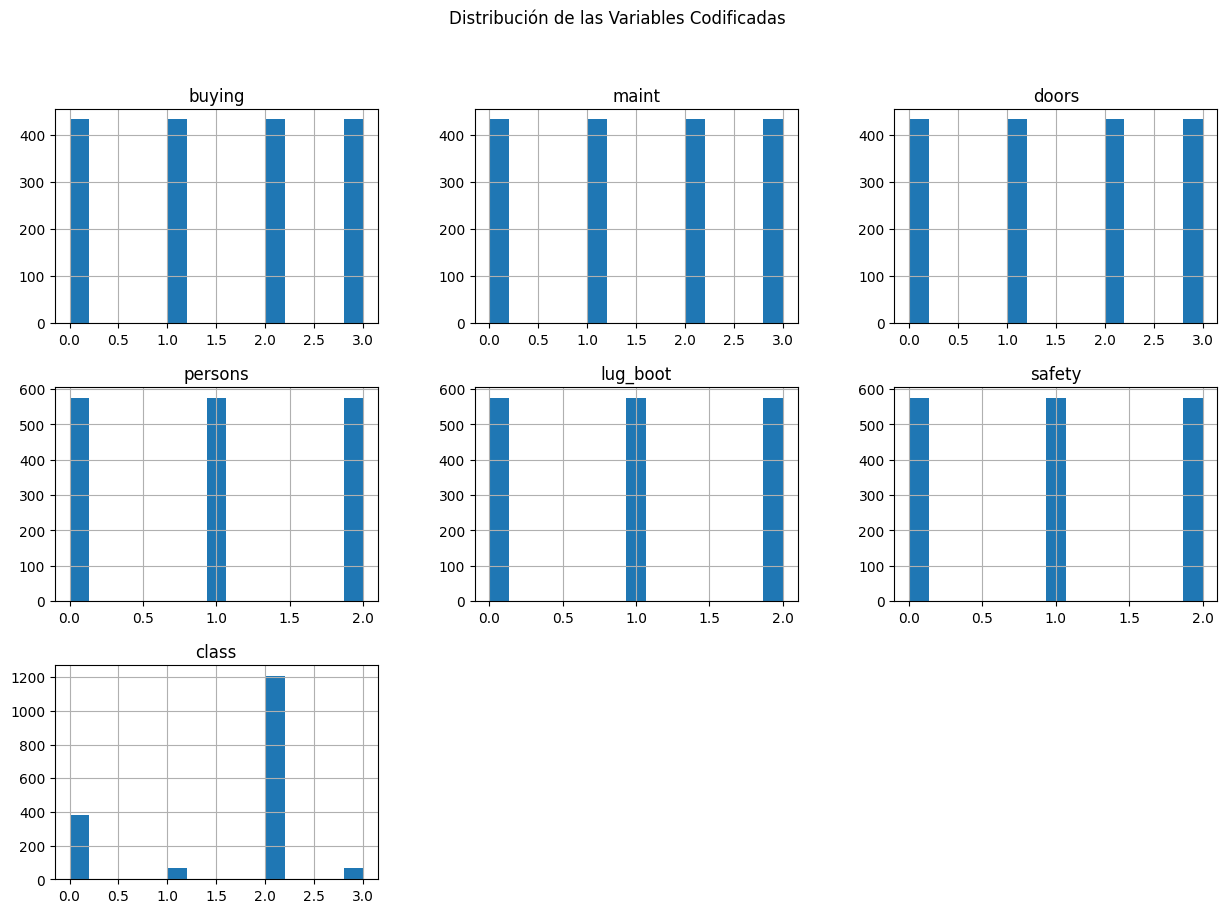

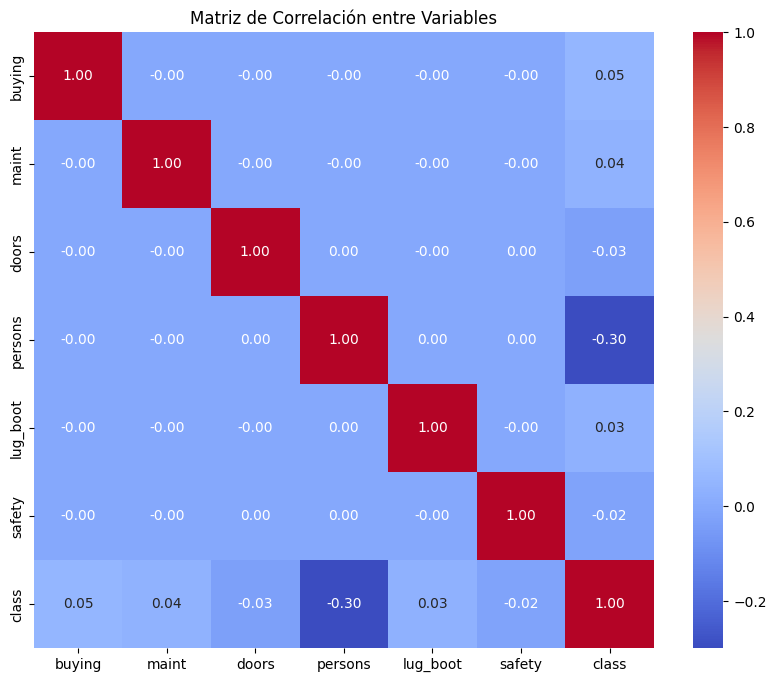

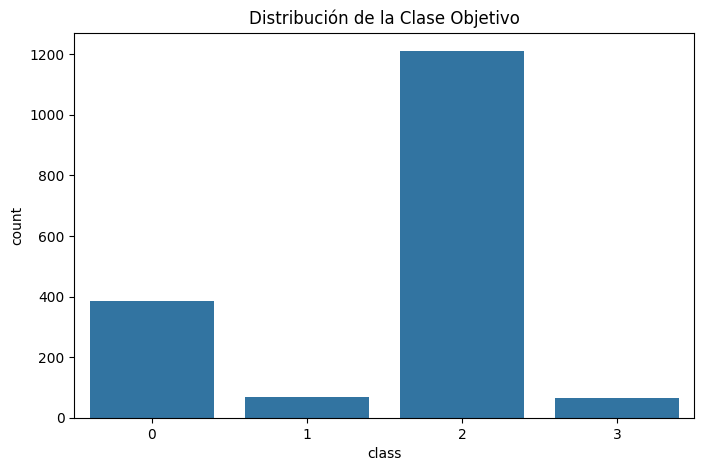

In [26]:
# @title Graficas
print(df.isnull().sum())
# Histogramas de las variables
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de las Variables Codificadas')
plt.show()
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables')
plt.show()
# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title('Distribución de la Clase Objetivo')
plt.show()